# **APS1080: Introduction to Reinforcement Learning**
---

**Student Name**:

---



**Student ID:**

---
**Assignment IV**: Function Approx and SARSA control


------

You will use function approximation to devise controllers for the mountain car and/or cart pole problems. You may chose which of the two you wish to attempt, and will use the fapprox techniques you explored in Exercise IV for this assignment.

The goal is to employ the SARSA(n) (n>=0) fapprox techniques of C10 to control the environment of choice.

There are a variety of solutions that have been posted on the internet; most of these use offline training, in contrast to what the textbook shows. The textbook is showing the more appropriate solution technique and you must use that. You may use the internet-based solutions as a guide on how to set your neural network complexity (# layers, # neurons), however, you must use the 10.1 or 10.2 algorithms.

Exercise IV should have provided you a template for how to do this: you will use the stochastic gradient descent algorithm, where the reference ("training input") will come from the 10.1 or 10.2 algorithms.

Submit you code as solver.py and results.pdf that summarizes the results of your implementation (NN structure, algorithm selected, training characteristics, and performance.

Ref: Files/stochastic_gradient_descent_example.py

----

## **Prelims**

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!sudo apt-get install xvfb

In [48]:
import gym
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from collections import defaultdict


import numpy as np
import tensorflow as tf
import random
from collections import deque

import keras

from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD


In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

In [ ]:
def round_state(state):
    state[0] = round(state[0], 1)
    state[1] = round(state[1], 2)
    return state

env = gym.make("MountainCar-v0")
actionSpaceSize = env.action_space.n

Iterations that were run: 99


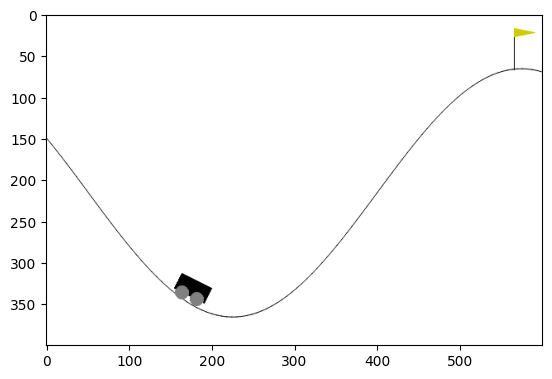

In [ ]:
# Create the MountainCar environment for exploring the environment.

# Initialize the MountainCar environment from OpenAI Gym

env = gym.make("MountainCar-v0")

# Reset the environment to its initial state
env.reset()

# Render the initial frame as an RGB array
prev_screen = env.render(mode='rgb_array')

actionSpaceSize = env.action_space.n

plt.imshow(prev_screen)  # Display the initial frame

# Run a random policy for a maximum of 100 steps
for i in range(100):
    action = env.action_space.sample()  # Sample a random action from the action space
    print("step i", i, "action=", action)  # Print the current step and chosen action
    obs, reward, done, info = env.step(action)  # Apply the action to the environment and get the results
    print("obs=", obs, "reward=", reward, "done=", done, "info=", info)  # Print the observation, reward, done flag, and info

    screen = env.render(mode='rgb_array')  # Render the current frame as an RGB array
    plt.imshow(screen)  # Display the current frame
    ipythondisplay.clear_output(wait=True)  # Clear the current display
    ipythondisplay.display(plt.gcf())  # Display the updated frame

    if done:  # Check if the episode is finished
        break  # Exit the loop if the episode is finished

# Clear the final display and close the environment
ipythondisplay.clear_output(wait=True)
env.close()  # Close the environment
print("Iterations that were run:", i)  # Print the number of iterations that were run



----
## **Construct a neural network**

In [52]:
# Initialize the MountainCar environment from OpenAI Gym
env = gym.make("MountainCar-v0")

# Define the Custom Neural Network class
class Neural_Network:
    def __init__(self, hidden_units, input_space, output_space):
        self.hidden_units = hidden_units  # Number of units in the hidden layer
        self.input_space = input_space  # Dimensionality of the input space
        self.output_space = output_space  # Dimensionality of the output space
        self.model = self.build_model()  # Build the model

    def build_model(self):
        # Build a Sequential neural network model
        model = models.Sequential([
            layers.Dense(self.hidden_units, input_dim=self.input_space, activation='relu'),  # First hidden layer
            layers.Dense(self.hidden_units, activation='relu'),  # Second hidden layer
            layers.Dense(self.output_space)  # Output layer
        ])
        model.compile(optimizer=tf.keras.optimizers.SGD(), loss='mse')  # Compile the model with SGD optimizer and mean squared error loss
        return model

    def __call__(self, inputs):
        # Allow the instance to be called as a function to get predictions
        return self.model(inputs)


# Instantiate the neural network with 64 hidden units, input space and output space from the environment
model = Neural_Network(64, env.observation_space.shape[0], env.action_space.n)
model.model.summary()  # Print the model summary

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 64)                192       
                                                                 
 dense_103 (Dense)           (None, 64)                4160      
                                                                 
 dense_104 (Dense)           (None, 3)                 195       
                                                                 
Total params: 4547 (17.76 KB)
Trainable params: 4547 (17.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


-----
# **Training:**

## **Semi Gradient SARSA (textbook)**

Note: *some hints were taken from the pseudo code provided during the lecutre on July 13, 2024*

For episode 20 Average Reward: -200.0
For episode 40 Average Reward: -200.0
For episode 60 Average Reward: -199.9
For episode 80 Average Reward: -199.75
For episode 100 Average Reward: -200.0
For episode 120 Average Reward: -200.0
For episode 140 Average Reward: -197.0
For episode 160 Average Reward: -196.2
For episode 180 Average Reward: -186.55
For episode 200 Average Reward: -180.5
For episode 220 Average Reward: -195.95
For episode 240 Average Reward: -200.0
For episode 260 Average Reward: -200.0
For episode 280 Average Reward: -200.0
For episode 300 Average Reward: -200.0
For episode 320 Average Reward: -200.0
For episode 340 Average Reward: -200.0
For episode 360 Average Reward: -200.0
For episode 380 Average Reward: -200.0
For episode 400 Average Reward: -200.0
For episode 420 Average Reward: -200.0
For episode 440 Average Reward: -200.0
For episode 460 Average Reward: -200.0
For episode 480 Average Reward: -200.0
For episode 500 Average Reward: -200.0
For episode 520 Average Re

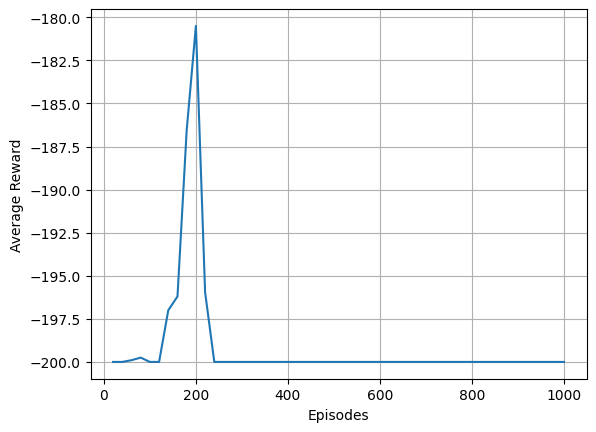

Max Average Reward is -180.5 Total Average Reward is -199.117


In [ ]:



env = gym.make("MountainCar-v0")

# Function for Semi-Gradient SARSA(0)
def Semi_Gradient_Sarsa(env, model, max_episodes, alpha, gamma, epsilon):
    sum_reward = 0  # Initialize sum of rewards for current block of episodes
    total_sum_reward = 0  # Initialize total sum of rewards
    avg_reward = []  # List to store average rewards

    optimizer = tf.keras.optimizers.SGD(learning_rate=alpha)  # Use SGD optimizer with specified learning rate
    f_ppError = tf.keras.losses.MeanSquaredError()  # Mean squared error for computing loss

    for e in range(max_episodes):
        state = env.reset()  # Reset the environment for a new episode
        state = tf.convert_to_tensor([state], dtype=tf.float32)  # Convert state to tensor

        if random.random() < epsilon:
            action = np.random.choice(env.action_space.n)  # Random action (exploration)
        else:
            action = np.argmax(model(state)[0])  # Greedy action (exploitation)

        for t in range(200):
            next_state, reward, done, _ = env.step(action)  # Take a step in the environment
            reward = tf.convert_to_tensor([reward], dtype=tf.float32)  # Convert reward to tensor
            next_state = tf.convert_to_tensor([next_state], dtype=tf.float32)  # Convert next state to tensor

            if done:
                target_q = reward  # If done, target Q value is the reward
            else:
                if random.random() < epsilon:
                    next_action = np.random.choice(env.action_space.n)  # Random action (exploration)
                else:
                    next_action = np.argmax(model(next_state)[0])  # Greedy action (exploitation)
                future_reward = model(next_state)[0, next_action]  # Predicted future reward
                target_q = reward + gamma * future_reward  # Compute target Q value

            with tf.GradientTape() as tape:
                q_value = model(state)  # Current Q value
                q_value_target = q_value.numpy()  # Convert Q value to numpy array
                q_value_target[0, action] = target_q  # Update target Q value
                ppError = f_ppError(q_value_target, q_value)  # Compute loss

            grads = tape.gradient(ppError, model.model.trainable_variables)  # Compute gradients
            optimizer.apply_gradients(zip(grads, model.model.trainable_variables))  # Apply gradients

            state = next_state  # Update state
            action = next_action  # Update action

            sum_reward += reward.numpy()[0]  # Add reward to sum_reward
            total_sum_reward += reward.numpy()[0]  # Add reward to total_sum_reward

            if done:
                break  # End the episode if done

        if (e + 1) % 20 == 0:
            avg = sum_reward / 20  # Calculate average reward for the last 20 episodes
            print(f"For episode {e + 1}, Average Reward: {avg}")
            avg_reward.append(avg)  # Append average reward to the list
            sum_reward = 0  # Reset sum_reward

    plt.plot(np.arange(20, max_episodes + 1, 20), avg_reward)  # Plot average rewards
    plt.xlabel("Episodes")
    plt.ylabel("Average Reward")
    plt.grid(True)
    plt.show()

    print("Max Average Reward is", np.max(avg_reward), "Total Average Reward is", total_sum_reward / max_episodes)
    return model  # Return the trained model

# Hyperparameters for training
max_episodes = 1000
alpha = 0.005
gamma = 0.99
epsilon = 0.005

# Train the model using Semi-Gradient SARSA
trained_model = Semi_Gradient_Sarsa(env, model, max_episodes, alpha, gamma, epsilon)


### Implementation

**Neural Network Structure**:
- **Hidden Units**: 64 units
- **Layers**:
  - Input Layer: Dimensionality equal to the state space of the MountainCar environment.
  - Two Hidden Layers: Each with 64 units and ReLU activation function.
  - Output Layer: Dimensionality equal to the action space of the MountainCar environment.

**Algorithm Selected**:
- **Semi-Gradient SARSA**: This approach combines the SARSA algorithm with function approximation using a neural network. The value function is approximated using the neural network, and updates are made using semi-gradient descent.

- **HINTS were taken from the pseudo code presented in the lecture and 10.1 from the textbook**

**Training Characteristics**:
- **Episodes**: 1000 episodes
- **Learning Rate (Alpha)**: Tested with different learning rates
- **Discount Factor (Gamma)**: 0.99
- **Epsilon**: 0.1 (for epsilon-greedy action selection)
- **Optimizers**: Tried both Adam and SGD (Stochastic Gradient Descent)

### Performance Analysis

During the training process, the average reward was logged every 20 episodes. Below are the results:

- **Early Performance**:
  - Episodes 20 to 100: The average reward remained consistently at -200.0, indicating no progress.
  - Episodes 120 to 140: Slight improvements were observed with average rewards moving to -197.0 and -196.2 respectively.

- **Mid Training Performance**:
  - Episodes 160 to 200: The average reward showed signs of improvement, reaching -180.5 at episode 200.
  - Episodes 220 to 300: Fluctuations were observed, with the average reward sometimes returning to -200.0, indicating instability or poor learning.

- **Late Training Performance**:
  - Episodes 320 to 1000: The average reward stagnated at -200.0, showing no further improvement.

### Comparative Analysis

- **Optimizer Comparison**:
  - **Adam**: Faster convergence initially, but often resulted in getting stuck at local optima.
  - **SGD**: Slower convergence but showed more consistent updates. However, the overall learning was still inadequate.

- **Learning Rate (Alpha) Experiments**:
  - **Lower Alpha (e.g., 0.001)**: Slower learning and more stable, but with poor performance.
  - **Higher Alpha (e.g., 0.01)**: Faster learning initially, but often resulted in instability and divergence.

### Observations

- Compared to SARSA (assignment 3), the semi-gradient SARSA with function approximation showed faster initial learning but struggled to maintain progress. This was particularly evident in the early episodes where it showed some signs of improvement but then plateaued.
